<a href="https://colab.research.google.com/github/gastonestol/data-science-ml/blob/main/KNN-scratch-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter


In [11]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns = iris['feature_names'] + ['target'])

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

In [14]:
X.head()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(f"training set size: {X_train.shape[0]} samples")
print(f"test set size: {X_test.shape[0]} samples")

training set size: 120 samples
test set size: 30 samples


In [16]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)


In [17]:
print("X train before Normalization")
print(X_train[0:5])
print("X train after Normalization")
print(normalized_X_train[0:5])


X train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
X train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot after norm')

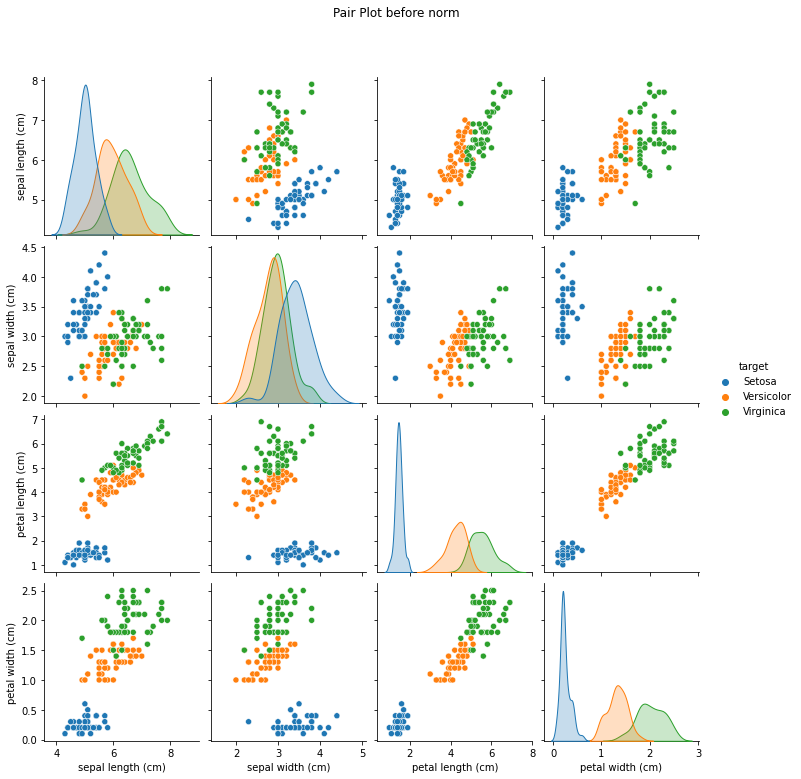

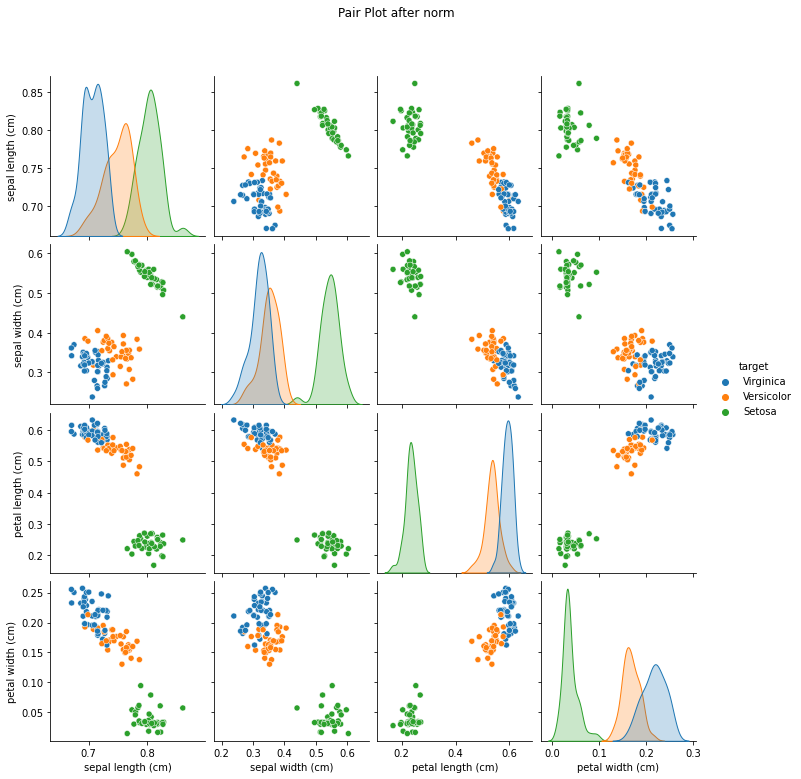

In [18]:
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}

before = sns.pairplot(iris_df.replace({"target": di}), hue = 'target')
before.fig.suptitle("Pair Plot before norm", y= 1.08)

iris_df_norm = pd.DataFrame(data = np.c_[normalized_X_train,y_train], columns = iris['feature_names'] + ['target'])

before = sns.pairplot(iris_df_norm.replace({"target": di}), hue = 'target')
before.fig.suptitle("Pair Plot after norm", y= 1.08)


In [26]:
def distance_ecu(x_train, x_test_point):
  distances = []
  for row in range(len(x_train)):
    current_train_point = x_train[row]
    current_distance = 0

    for col in range(len(current_train_point)):
      current_distance += (current_train_point[col] - x_test_point[col])**2
    
    current_distance = np.sqrt(current_distance)
    distances.append(current_distance)
  
  distances = pd.DataFrame(data=distances, columns=['dist'])
  return distances


In [20]:
def nearest_neighbours(distance_point, K):

  df_nearest = distance_point.sort_values(by=['dist'], axis=0)

  df_nearest = df_nearest[:K]
  return df_nearest

In [21]:
def voting(df_nearest, y_train):

  counter_vote = Counter(y_train[df_nearest.index])

  y_pred = counter_vote.most_common()[0][0]

  return y_pred

In [22]:
def KNN(x_train, y_train, x_test, K):
  y_pred = []
  for x_test_point in x_test:
    distance = distance_ecu(x_train, x_test_point)
    nearest_point = nearest_neighbours(distance, K)
    y_pred_point = voting(nearest_point, y_train)
    y_pred.append(y_pred_point)
  
  return y_pred

In [27]:
K = 3
y_pred = KNN(normalized_X_train, y_train, normalized_X_test, K)
print(y_pred)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]
